In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. 

In [2]:
df = pd.read_csv('fraud .csv')
df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,688974,interest,150024,0.0,Android,partner network,0.0
1,688974,interest,150024,0.0,iOS,partner network,0.0
2,688974,interest,150024,0.0,iOS,partner network,0.0
3,688974,interest,150024,0.0,iOS,partner network,0.0
4,688974,interest,150024,0.0,Android,partner network,0.0
...,...,...,...,...,...,...,...
3248971,253043,intent,216517,0.0,Android,search,1.5
3248972,253043,intent,216517,0.0,Android,search,1.5
3248973,253043,intent,216517,0.0,Android,search,1.5
3248974,253043,intent,216517,0.0,Android,search,1.5


In [5]:
funnel_stage_count = df.groupby('user_id')['funnel_stage'].nunique().reset_index()
funnel_stage_count

,user_id,funnel_stage
0,4,1
1,73,2
2,549,1
3,580,1
4,645,1
...,...,...
5090,1063356,1
5091,1063617,1
5092,1063945,1
5093,1063999,1


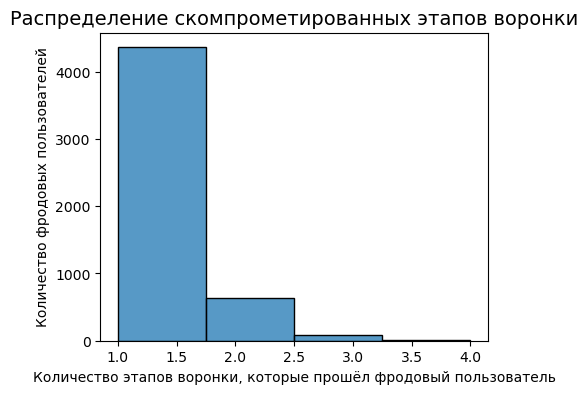

In [10]:
plt.figure(figsize=(5, 4))
sns.histplot(data = funnel_stage_count['funnel_stage'], bins = 4)
plt.title('Распределение скомпрометированных этапов воронки', fontsize = 14)
plt.xlabel('Количество этапов воронки, которые прошёл фродовый пользователь')
plt.ylabel('Количество фродовых пользователей')
plt.show()

Скорее всего атакован первый этап воронки (interest). Это легче всего, потому что на первоначальных этапах нет никах сложных действий (как например олата, подтверждение личности), просто клик и переход, тем самым имитируется итерес.

### 2.

In [43]:
df2 = pd.read_csv('data without fraud .csv')
df2

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,666743,interest,150000,0.0,Android,banner,0.50
1,512217,interest,150000,0.0,iOS,video,0.75
2,399556,interest,150000,0.0,iOS,search,1.50
3,230119,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
979800,501946,intent,224125,0.0,Android,search,1.50
979801,749577,purchase,224647,2136.0,iOS,search,1.50
979802,929180,intent,224682,0.0,iOS,search,1.50
979803,1034498,intent,225430,0.0,iOS,search,1.50


In [62]:
order = ['interest', 'consideration', 'intent', 'purchase']
df2['funnel_stage'] = pd.Categorical(df2['funnel_stage'], categories=order, ordered=True)

user_by_channel = (df2.groupby(['ad_channel', 'funnel_stage'])['user_id']
      .nunique()
      .reset_index(name='user_count'))
user_by_channel.head()

,ad_channel,funnel_stage,user_count
0,banner,interest,90994
1,banner,consideration,47422
2,banner,intent,7539
3,banner,purchase,688
4,native,interest,19200


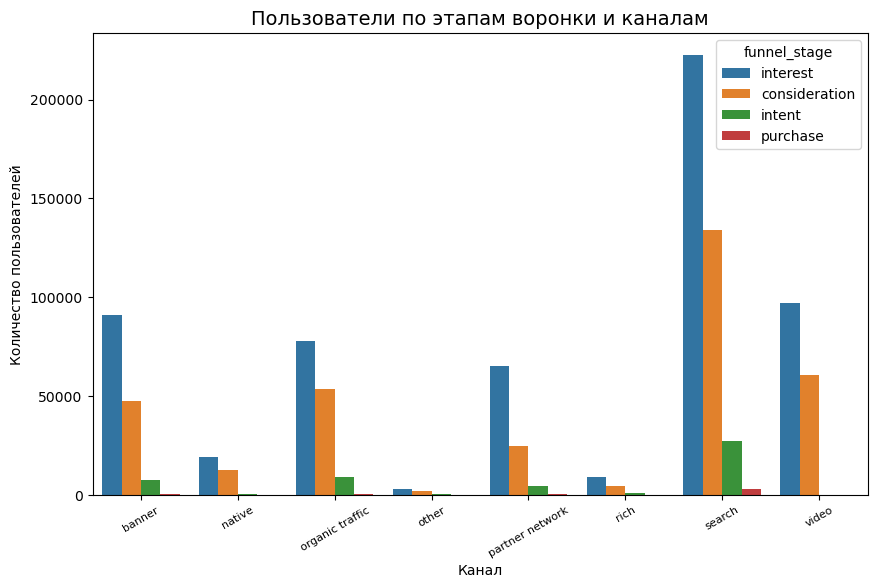

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x='ad_channel', y='user_count', data = user_by_channel, hue='funnel_stage')
plt.title('Пользователи по этапам воронки и каналам', fontsize=14)
plt.xticks(fontsize=8 ,rotation=30)
plt.xlabel('Канал', fontsize=10)
plt.ylabel('Количество пользователей', fontsize=10)
plt.show()

Наименее перспективный канал коммуникаций - Video, так как у него количество пользователей уже на этапе intent практически отсутствует

### 3.

In [63]:
df3 = pd.read_csv('data without fraud .csv')
df3

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,666743,interest,150000,0.0,Android,banner,0.50
1,512217,interest,150000,0.0,iOS,video,0.75
2,399556,interest,150000,0.0,iOS,search,1.50
3,230119,interest,150000,0.0,iOS,search,1.50
4,619571,consideration,150000,0.0,iOS,search,1.50
...,...,...,...,...,...,...,...
979800,501946,intent,224125,0.0,Android,search,1.50
979801,749577,purchase,224647,2136.0,iOS,search,1.50
979802,929180,intent,224682,0.0,iOS,search,1.50
979803,1034498,intent,225430,0.0,iOS,search,1.50


In [69]:
df_profit = df3[df3['funnel_stage'] == 'purchase'].groupby('ad_channel')['profit'].sum().reset_index(name='profit')
df_profit

,ad_channel,profit
0,banner,465814.0
1,native,31665.0
2,organic traffic,370283.0
3,other,24596.0
4,partner network,473965.0
5,rich,29301.0
6,search,2109647.0
7,video,3595.0


In [70]:
df_price = df3.groupby('ad_channel')['price'].sum().reset_index(name='price')
df_price

,ad_channel,price
0,banner,73321.50
1,native,64450.00
2,organic traffic,0.00
3,other,0.00
4,partner network,0.00
5,rich,36817.50
6,search,580308.00
7,video,118457.25


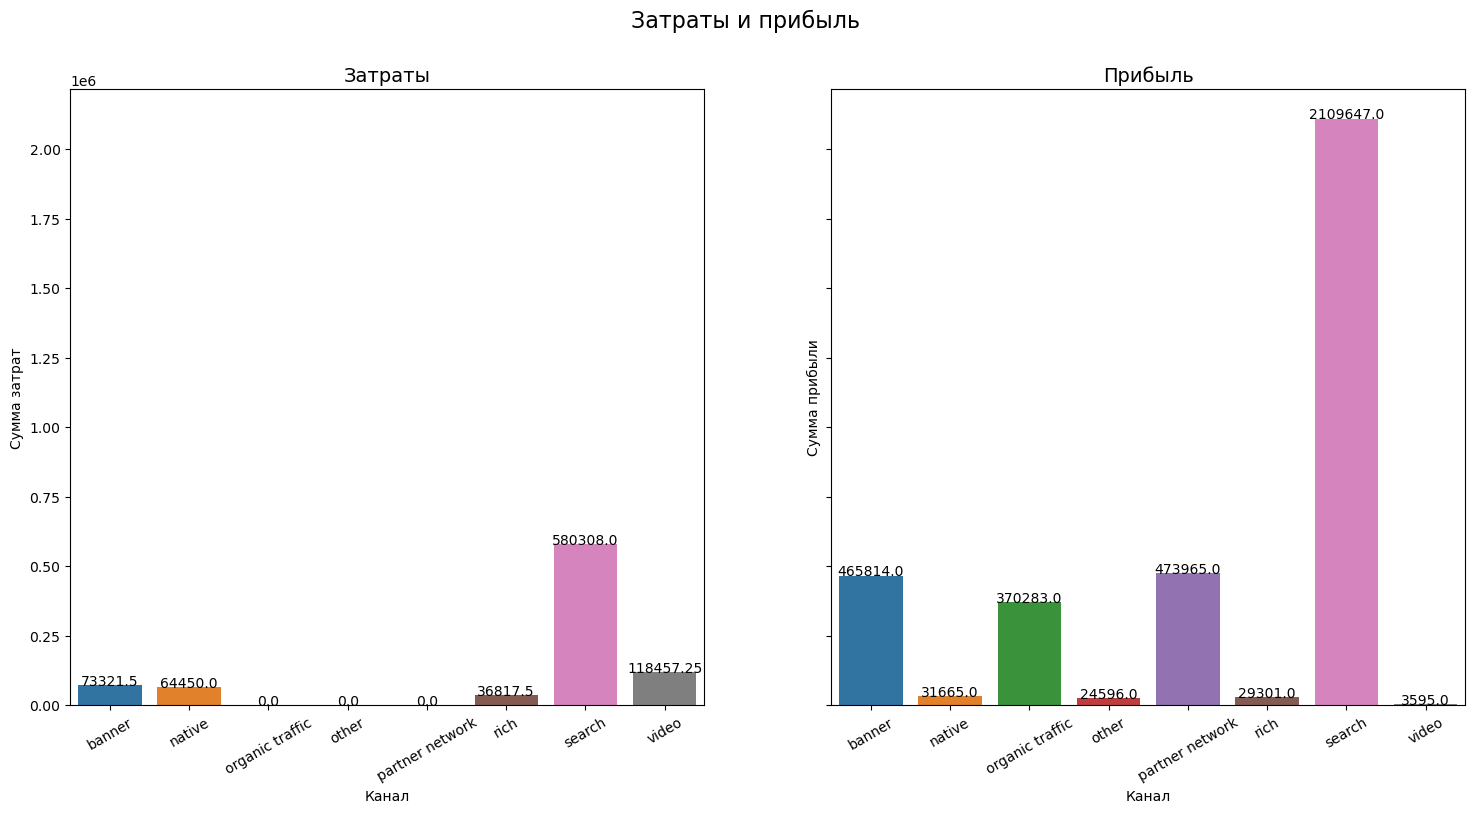

In [87]:
df_result = pd.merge(df_profit, df_price, on = 'ad_channel', how='outer')

fig, ax = plt.subplots(1, 2, figsize=(18,8), sharey=True)
fig.suptitle('Затраты и прибыль', fontsize=16)
fig.subplots_adjust(hspace=0.5)

sns.barplot(data=df_result, x = "ad_channel", y ='profit', ax=ax[1])
ax[1].set_title('Прибыль', fontsize=14)
ax[1].tick_params(axis='x', labelrotation=30)
ax[1].set_xlabel('Канал')
ax[1].set_ylabel('Сумма прибыли')
for i, val in enumerate(df_result['profit']):
    ax[1].text(i, val+1, str(val), ha='center')


sns.barplot(data=df_result, x = "ad_channel", y ='price', ax=ax[0])
ax[0].set_title('Затраты', fontsize=14)
ax[0].tick_params(axis='x', labelrotation=30)
ax[0].set_xlabel('Канал')
ax[0].set_ylabel('Сумма затрат')
for j, val in enumerate(df_result['price']):
    ax[0].text(j, val+1, str(val), ha='center')

plt.show()

Затраты у каналов native, rich, video больше чем прибыль

### 4.

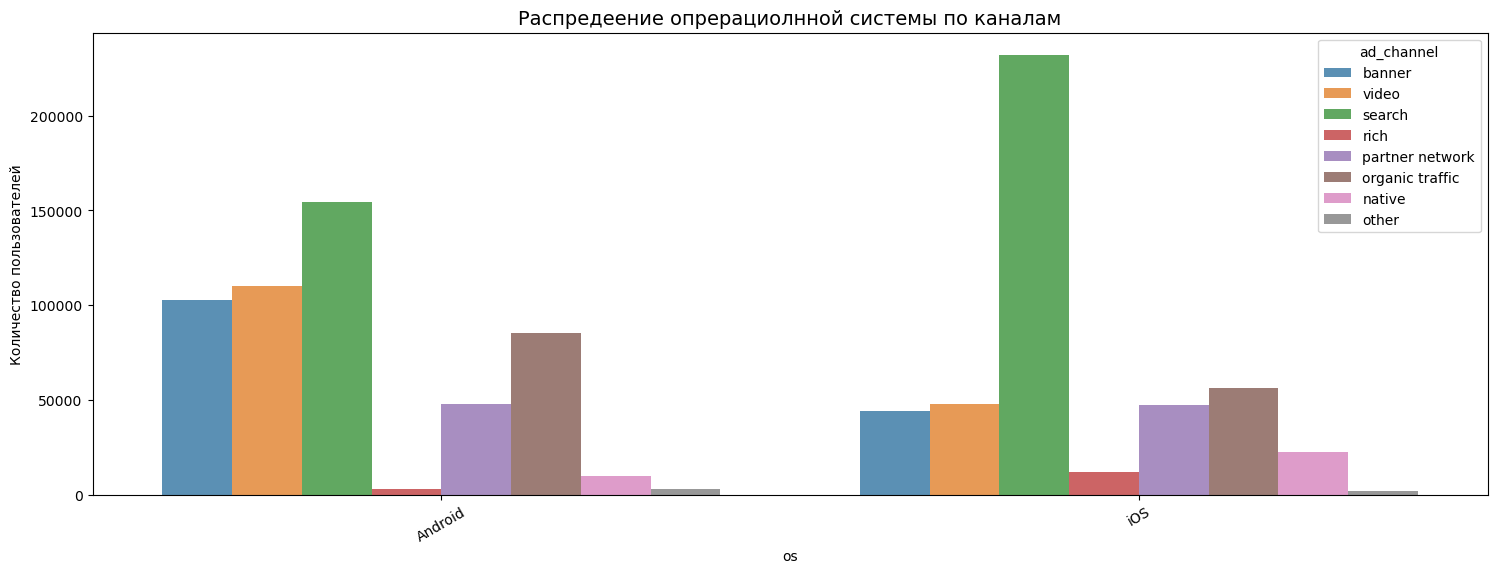

In [113]:
fig, ax = plt.subplots(figsize=(18,6))
sns.countplot(data=df3, x="os", hue='ad_channel', ax=ax, alpha=0.80)

ax.set_title('Распредеение опрерациолнной системы по каналам', fontsize=14)
ax.tick_params(axis='x', labelrotation=30)
ax.set_ylabel('Количество пользователей')

plt.show()

И для Android и iOS наиболее популярным каналом является search, наименее - rich

In [98]:
## Соотношение в долях OS по каналам
df_OS = df3.groupby(['ad_channel', 'os'])['user_id'].count().unstack()
df_OS

os,Android,iOS
ad_channel,,
banner,102633,44010
native,9733,22492
organic traffic,85136,56083
other,3214,2066
partner network,47613,47283
rich,2981,11746
search,154680,232192
video,110311,47632


In [117]:
df_percent = df_OS.div(df_OS.sum(axis=1), axis=0)
df_percent

os,Android,iOS
ad_channel,,
banner,0.699883,0.300117
native,0.302033,0.697967
organic traffic,0.602865,0.397135
other,0.608712,0.391288
partner network,0.501739,0.498261
rich,0.202417,0.797583
search,0.399822,0.600178
video,0.698423,0.301577


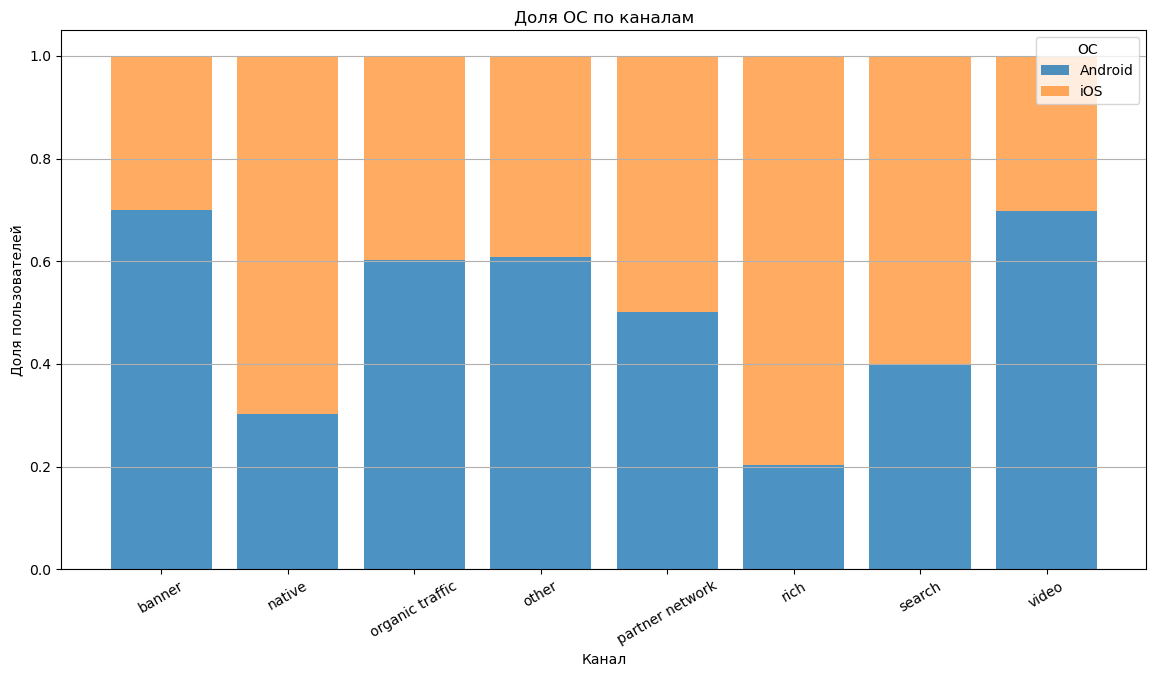

In [121]:
channel = df_percent.index.tolist()              
android = df_percent['Android'].values          
ios = df_percent['iOS'].values                  


fig, ax = plt.subplots(figsize=(14, 7))
ax.bar(x, android, label='Android', alpha=0.80)
ax.bar(x, ios, bottom=android, label='iOS', alpha=0.65)  # stacked: iOS "на" Android


ax.set_ylabel('Доля пользователей')
ax.set_xlabel('Канал')
ax.set_title('Доля ОС по каналам')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=30)
ax.legend(title='ОС')
ax.grid(True, axis='y')
plt.show()

Наибольшие доли по использованию:
- для Androida по каналам banner и video
- для iOS по каналам native и rich

Для канала partner network количество пользователей распределено одинаково